เขียนโปรแกรม Python ด้วยสองวิธีคือ Mesh Analysis และ Nodal Analysis ตามลำาดับ เพื่อวิเคราะห์
ปริมาณกระแสไฟฟ้าในวงจร หาแรงดันไฟฟ้าที่จุด 1 - 4 ในวงจรเทียบกับ GND ของวงจร และกระแสที่ไหล
ผ่านตัวต้านท้านในวงจร (R1 - R5) ในวงจรไฟฟ้าตามรูปที่ 1

In [61]:
# install modules
! pip install sympy
! pip install schemdraw

In [62]:
from sympy import symbols, Eq, Rational, solve, latex
from schemdraw import Drawing, elements as elm, config
from IPython.display import display, Math
from functools import partial

In [63]:
def print_eq(eq, **kwargs):
    pre = kwargs.get('pre', '')
    post = kwargs.get('post', '')
    line = latex(pre) + latex(eq) + latex(post)
    display(Math(line))

### Mesh Analysis

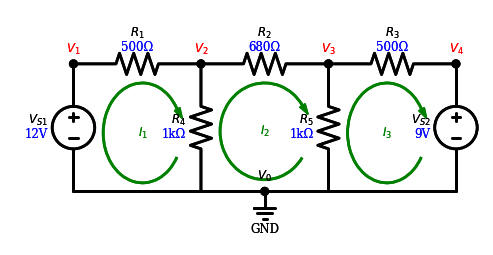

In [64]:
config(font='serif', fontsize=10, bgcolor='white')

with Drawing(show=False) as d:
    d += (el_vs1 := elm.SourceV().up().label('$V_{S1}$', valign='bottom').label('12V', valign='top', color='blue'))
    d += elm.Dot().label('$V_1$', color='red')
    d += (el_r1 := elm.Resistor().right().label('$R_1$', valign='bottom', ofst=0.3).label('500Ω', valign='top', color='blue', ofst=0.3))
    d += elm.Dot().label('$V_2$', color='red')
    d.push()
    d += (el_r4 := elm.Resistor().down().label('$R_4$', valign='bottom').label('1kΩ', valign='top', color='blue'))
    d += (el_l1 := elm.Line().left())
    d.pop()
    d += (el_r2 := elm.Resistor().right().label('$R_2$', valign='bottom', ofst=0.3).label('680Ω', valign='top', color='blue', ofst=0.3))
    d += elm.Dot().label('$V_3$', color='red')
    d.push()
    d += (el_r5 := elm.Resistor().down().label('$R_5$', valign='bottom').label('1kΩ', valign='top', color='blue'))
    d += elm.Line().left(1.5)
    d += (el_gnd := elm.Dot().label('$V_0$', loc='top'))
    d.push()
    d += elm.Line().left(1.5)
    d.pop()
    d += elm.Ground().label('GND', loc='bottom')
    d.pop()
    d += (el_r3 := elm.Resistor().right().label('$R_3$', valign='bottom', ofst=0.3).label('500Ω', valign='top', color='blue', ofst=0.3))
    d += elm.Dot().label('$V_4$', color='red')
    d += (el_vs2 := elm.SourceV().down().reverse().label('$V_{S2}$', valign='bottom').label('9V', valign='top', color='blue'))
    d += (el_l3 := elm.Line().left())

with Drawing() as m:
    m += elm.ElementDrawing(d)
    m += elm.LoopCurrent([el_r1, el_r4, el_l1, el_vs1], label='$I_1$', color='green')
    m += elm.LoopCurrent([el_r2, el_r5, el_gnd, el_r4], label='$I_2$', color='green')
    m += elm.LoopCurrent([el_r3, el_vs2, el_l3, el_r5], label='$I_3$', color='green')
    m.save('./lab2_data/L4_fig1.png', transparent=False)

In [65]:
i1, i2, i3, r1, r2, r3, r4, r5, vs1, vs2 = symbols('I1:4 R1:6 V_S1:3')
eq1 = Eq(-vs1 + i1 * r1 + i1 * r4 - i2 * r4, 0)
eq2 = Eq(i2 * r4 + i2 * r2 + i2 * r5 - i1 * r4 - i3 * r5, 0)
eq3 = Eq(i3 * r5 + i3 * r3 + vs2 - i2 * 1000, 0)
eqs = [eq1, eq2, eq3]
for i in range(len(eqs)):
    print_eq(eqs[i])
    eqs[i] = eqs[i].subs({vs1: 12, vs2: 9, r1: 500, r2: 680, r3: 500, r4: 1000, r5: 1000})
    print_eq(
        eqs[i], 
        pre=chr(int(f'{2460+i}', 16)) + ' '
    )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [66]:
ans = solve(eqs, (i1, i2, i3))
for var in ans:
    print_eq(Eq(var, (ans[var]*1000).evalf(4)), post=' mA')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [67]:
vr1, vr2, vr3 = symbols('V_R1:4')
eq1 = Eq(vr1, i1*r1)
eq2 = Eq(vr2, i2*r2)
eq3 = Eq(vr3, i3*r3)
eqs = [eq1, eq2, eq3]
for i in range(len(eqs)):
    print_eq(eqs[i])
    eqs[i] = eqs[i].subs({i1: ans[i1], i2: ans[i2], i3: ans[i3], r1: 500, r2: 680, r3: 500})
    print_eq(eqs[i].evalf(4), post=' V')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Nodal Analysis

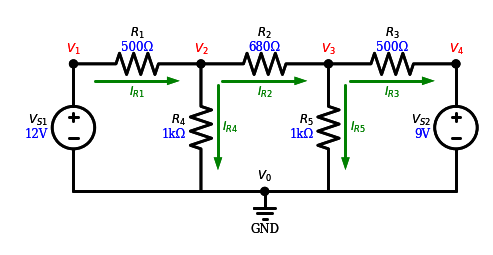

In [68]:
with Drawing() as n:
    n += elm.ElementDrawing(d)
    n += elm.CurrentLabel(top=False).at(el_r1).label('$I_{R1}$').color('green')
    n += elm.CurrentLabel(top=False).at(el_r2).label('$I_{R2}$').color('green')
    n += elm.CurrentLabel(top=False).at(el_r3).label('$I_{R3}$').color('green')
    n += elm.CurrentLabel(top=False, reverse=True).at(el_r4).label('$I_{R4}$').color('green')
    n += elm.CurrentLabel(top=False, reverse=True).at(el_r5).label('$I_{R5}$').color('green')
    n.save('./lab2_data/L4_fig2.png', transparent=False)

In [69]:
v1, v2, v3, v4 = symbols('V1:5')
eq1 = Eq(v1, Eq(vs1, 12))
eq2 = Eq((v1-v2)/r1, (v2-v3)/r2 + v2/r4)
eq3 = Eq((v2-v3)/r2, v3/r5 + (v3-v4)/r3)
eq4 = Eq(v4, Eq(vs2, 9))
eqs = [eq1, eq2, eq3, eq4]
for i in range(len(eqs)):
    print_eq(eqs[i], pre=chr(int(f'{2460+i}', 16)) + ' ')
eq5 = eq2.subs({v1: 12, r1: 500, r2: 680, r4: 1000})
print_eq(eq5, pre='① → ② ; ⑤ ')
eq6 = eq3.subs({v4: 9, r2: 680, r3: 500, r5: 1000})
print_eq(eq6, pre='④ → ③ ; ⑥ ')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [70]:
ans = solve([eq5, eq6], (v2, v3))
print_eq(Eq(v1, 12), post=' V')
for var in ans:
    print_eq(Eq(var, ans[var].evalf(4)), post=' V')
print_eq(Eq(v4, 9), post=' V')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [71]:
eq1 = Eq(vr1, v1-v2)
eq2 = Eq(vr2, v2-v3)
eq3 = Eq(vr3, v3-v4)
eqs = [eq1, eq2, eq3]
for i in range(len(eqs)):
    print_eq(eqs[i])
    eqs[i] = eqs[i].subs({v1: 12, v2: ans[v2], v3: ans[v3], v4: 9})
    print_eq(eqs[i].evalf(4), post=' V')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>